# Analysis of the paths 


The analysis is made under the assumption that people are doing their best when playing.
- Extraction of the length of the paths
    - TO DO:
        - Reduce computational power (Hashing, code improvement,...) 
            
            
- Reproduction of the optimal path, or inspiration or use of https://www.sixdegreesofwikipedia.com/
    - TO DO: (This task is going to be the thoughest, seems quite difficult but feasible.)
        - Implement a local version of the website (Many optimal paths possible)
            - Creation of the SQLITE database
            - Running of the local website 
        
        
- Comparison to the optimal one (Most important part of the analysis) 
    - TO DO: (Once optimal paths are found) 
        - Apply the comparison, extract the deviations from the optimal path (From the results of other group members analysis
            - From deviations, towards which category / concepts / words are people drawn ? Link with the influence of the environment.
            - By which factor are people biased ? 
            - From optimal paths, which category contains the most informations / is the most useful to get the fastest ? 
            - Apply to optimal paths, which category contains the most informations ? Link with position of the links

### Goals of P2
- Get acquainted with data
- preprocess it
- complete descriptive statistics tasks 
***
### Expectations
- Pipeline in place
- Documentend notebook
- Show clear project goals
### Exemples of what we should show: 
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

        

In [4]:
#Import of the library
import numpy as np
from urllib.parse import unquote
import matplotlib.pyplot as plt 

import pandas as pd 
from tqdm import trange
import pickle as pkl
import pandas as pd 

## Data Wrangling
***
### Matrix of shortest path
In order to compare average users paths with the optimal ones.

In [8]:
#%%timeit -r 1 -n 1

# Function to write the matrix in an annex file, to save some time 
def shortest_path_matrix_writing():
    number_of_words = 4604 #Given data
    with open("wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt", "r") as f:
        shortest_distance_matrix = np.zeros((number_of_words,number_of_words))
        for i in range(17):
            f.readline()
        for i, line in enumerate(f) :
            line = line.strip('\n')
            for j, number in enumerate(line):
                if number == '_': #replacing impossible paths with nans
                    number = np.nan
                else:
                    number = int(number)
                shortest_distance_matrix[i,j] = number
    np.save("data/shortest_distance_matrix.npy", shortest_distance_matrix)
    return 
shortest_path_matrix_writing()

In [9]:
shortest_distance_matrix = np.load("data/shortest_distance_matrix.npy")
number_of_words = 4604

Following initial analysis

In [10]:
d1_shortest_matrix = np.reshape(shortest_distance_matrix ,-1)
"""plt.hist(d1_shortest_matrix, bins = 10, density = True)
plt.xlabel("Number of steps")
plt.ylabel("Frequencies")
plt.title("Histogram of the possible paths")"""
print("Mean of shortest paths: %.1f" % (np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)])))
print("Median: %.1f" % np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)]))
print("Frequence of impossible paths: %.2f " %
      (len(d1_shortest_matrix[np.isnan(d1_shortest_matrix)])/len(d1_shortest_matrix)))

Mean of shortest paths: 3.2
Median: 3.2
Frequence of impossible paths: 0.12 


### Articles dataset
In order to associate path with names as the shortest path matrix in the same order as articles.

We use the library urllib.parse in order to decode from URL.

By using %%timeit, we notice a notable time difference in execution time when decoding from URL. 

We decide not to decode it straightaway but only when it is necessary (when we need to know the name of the article) as it is for now not necessary to decode the URL encoding for the names of the articles. 

In [11]:
articles = pd.read_csv("wikispeedia_paths-and-graph/articles.tsv",
                         sep = '\t', skiprows = 12, names = ['article'])

In [12]:
def article_parse(article):
    article = unquote(article).replace('_', ' ')
    return article
articles['article_decoded']= articles.article.apply(article_parse)


In [13]:
articles

,article,article_decoded
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Áedán mac Gabráin
1,%C3%85land,Åland
2,%C3%89douard_Manet,Édouard Manet
3,%C3%89ire,Éire
4,%C3%93engus_I_of_the_Picts,Óengus I of the Picts
...,...,...
4599,Zionism,Zionism
4600,Zirconium,Zirconium
4601,Zoroaster,Zoroaster
4602,Zuid-Gelders,Zuid-Gelders


***
### Categories data
In order to infer a categorie favored by the players.

Many articles have several categories, some have none. 

In [14]:
categories = pd.read_csv("wikispeedia_paths-and-graph/categories.tsv",
                         sep = '\t', skiprows = 13, names = ['article', 'category'])
#print(nb_by_cat)
categories['article']= categories.article.apply(article_parse)

nb_by_cat = categories.groupby('category').count()
"""
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (8,6))
fig.tight_layout(pad = 5)
fig.suptitle('Number of articles per category', fontsize = 17)

ax[1].hist(nb_by_cat, bins = 50, density = False)
ax[0].boxplot(nb_by_cat)
ax[1].set_title("Histogram")
ax[0].set_title("Boxplot")
ax[1].set_xlabel('Number of articles in a category')
ax[1].set_ylabel('Frequencies')
ax[0].set_xticks([])
ax[1].set_xlim([0,150])"""

print("There's %d categories\n" % len(nb_by_cat))
print("Max is %s with %d\nMin is %s with %d\nMedian is at %d\nMean is at %d" % 
      (nb_by_cat['article'].idxmax(), max(nb_by_cat['article']),nb_by_cat['article'].idxmin(), 
       min(nb_by_cat['article']),nb_by_cat['article'].median(), nb_by_cat['article'].mean()))

pd.set_option('display.max_rows', 10)
print("Categories ranked by number of article they contain:\n")
print(nb_by_cat.sort_values('article', ascending = False))

There's 129 categories

Max is subject.Countries with 229
Min is subject.Art.Artists with 2
Median is at 27
Mean is at 40
Categories ranked by number of article they contain:

                                                    article
category                                                   
subject.Countries                                       229
subject.Science.Biology.Birds                           161
subject.Geography.Geography_of_Great_Britain            124
subject.Science.Chemistry.Chemical_elements             119
subject.Science.Biology.Mammals                         114
...                                                     ...
subject.Geography.Antarctica                              8
subject.People.Chemists                                   8
subject.People.Producers_directors_and_media_fi...        8
subject.IT.Cryptography                                   6
subject.Art.Artists                                       2

[129 rows x 1 columns]


In [15]:
categories['subject'] = categories['category'].map(lambda x: x.split('.')[1])
categories

,article,category,subject
0,Áedán mac Gabráin,subject.History.British_History.British_Histor...,History
1,Áedán mac Gabráin,subject.People.Historical_figures,People
2,Åland,subject.Countries,Countries
3,Åland,subject.Geography.European_Geography.European_...,Geography
4,Édouard Manet,subject.People.Artists,People
...,...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements,Science
5200,Zoroaster,subject.People.Religious_figures_and_leaders,People
5201,Zuid-Gelders,subject.Geography.European_Geography,Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages,Language_and_literature


In [16]:
nb_by_subject = categories.groupby('subject').count()
nb_by_subject['article']

subject
Art                        38
Business_Studies           88
Citizenship               224
Countries                 229
Design_and_Technology     254
                         ... 
Mathematics                45
Music                      97
People                    689
Religion                  134
Science                  1122
Name: article, Length: 15, dtype: int64

***
### Paths data 
In order to analyze the players behaviour (only finished paths)

In [17]:
paths_finished = pd.read_csv("wikispeedia_paths-and-graph/paths_finished.tsv", 
                             sep = '\t', skiprows = 16, usecols = [3], names = ['paths'])

### Analysis of the paths

When we look for certains user's paths length average, we want to get the index of the intial and final words to obtain the comparison with optimal length. 

Assuming we ignore when they go back.

The words need to be accessible for later

In [18]:
def paths_pickled(step):
    
    header = ['index_initial', 'index_final','length_path','length_path_bs','path', 'path_backslash']
    paths_unpacked = pd.DataFrame(columns = header, dtype = object)
    
    for j in trange(0,len(paths_finished),step):
        
        each_word_bs = paths_finished['paths'][j].split(';')
        path_bs_length = len(each_word_bs)
        each_word = paths_finished['paths'][j].replace('<;', '').split(';') # .replace() to ignore when they go back
        
        path_length = len(each_word)
        index_initial = articles.index(each_word[0])
        index_final  = articles.index(each_word[-1])
        
        to_df = [index_initial, index_final, path_length, path_bs_length, each_word, each_word_bs]
        
        paths_unpacked.loc[j] = to_df
        
    paths_unpacked.to_pickle("data/paths_dataframe.pkl")

        
    return 

    #print("Beginning: %s \t End: %s" % (each_word[0], each_word[-1]))
    #print("Length of the path: %15d" % int(len(each_word)))
    #print("Length of the optimal path: %7d"  % shortest_distance_matrix[index_initial, index_final])

In [19]:
paths_unpacked = pd.read_pickle("data/paths_dataframe.pkl")

Descriptive statistics of the finished_paths datas

In [20]:
path_lengths = paths_unpacked['length_path']
path_lengths_bs = paths_unpacked['length_path_bs']

"""
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (10, 8))
fig.tight_layout(pad = 5)
fig.suptitle('Length of the paths played', fontsize = 20)


ax[0,0].hist(path_lengths, bins = 150, density = True)
ax[0,1].hist(np.log10(paths_unpacked['length_path'].astype(float)), bins = 150, density = True )
ax[1,0].boxplot(path_lengths)
ax[1,1].boxplot(np.log10(paths_unpacked['length_path'].astype(float)))
ax[0,0].set_title("Histogram of lengths")
ax[0,1].set_title("Histogram of log-lengths")
ax[1,0].set_title("Boxplot of lengths")
ax[1,1].set_title("Boxpot of log-lengths")

ax[0,0].set_xlim([0,50])
ax[1,0].set_ylim([0,50])
ax[0,0].set_xlabel('Number of articles in a category')
ax[0,0].set_ylabel('Frequencies')
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])"""

print("Max: % 7.1f" % max(path_lengths))
print("Mean: %6.1f" % path_lengths.mean())
print("Median: %4.1f" % path_lengths.median())
print("Median: %4.1f" % path_lengths_bs.median())



Max:   420.0
Mean:    6.4
Median:  6.0
Median:  6.0


From this initial analysis, it seems players use 3 more clicks in average than optimal paths

***
## Following steps

Once the optimal paths are found, we will be able to establish a comparison between the optimal and the played paths. 

Everytime a player plays a move that make the paths get 1 step longer, we will consider it a 'sub-optimal' decision and try to find a explanation from the different factors studied. For example: a decision induced by an external event, or the position of the links in the page.

The analysis will be carried on the word inducing the 'sub-optimal' decision by analyzing it's charachteristics (what categories of links are present on the page, their respective position, the numbers of game played (win/loose) played before,...) 

In [21]:
from collections import deque
import pandas as pd
import networkx as nx

UsageError: CWD no longer exists - please use %cd to change directory.


In [25]:
links_in_pages = pd.read_pickle('data/final_df.pkl')
lip = links_in_pages.drop_duplicates(subset = ['page', 'link'])

lip = lip[['page', 'link']]
data_grouped = lip.groupby("page")

# Create a dictionary from each group, with the page name as the key
data_dict = data_grouped.apply(lambda x: {x.name: x["link"].tolist()})

dict_data = {}
for key in data_dict:
    dict_data.update(key)

titles = lip['page'].unique()
links_in_pages

,X,Y,link,page,distance
0,211.649994,74.949997,Dál Riata,Áedán mac Gabráin,224.528889
1,281.850006,74.949997,Kingdom,Áedán mac Gabráin,291.645209
2,432.149994,74.949997,Scotland,Áedán mac Gabráin,438.601322
3,597.750000,74.949997,Ireland,Áedán mac Gabráin,602.430547
4,939.750000,74.949997,Columba,Áedán mac Gabráin,942.734090
...,...,...,...,...,...
178379,314.250000,2789.466553,Romania,ZX Spectrum,2807.111810
178380,383.549988,2789.466553,Brazil,ZX Spectrum,2815.712031
178381,414.149994,3126.899902,Nintendo,ZX Spectrum,3154.207225
178382,984.750000,3126.899902,Jet Set Willy,ZX Spectrum,3278.297662


In [26]:
D = nx.DiGraph()
D.add_nodes_from(dict_data.keys())

for key in dict_data.keys():
    for item in dict_data[key]:
        D.add_edge(key, item)
print(D)

DiGraph with 8021 nodes and 126093 edges


In [61]:
def errors_to_pickle(step):
    error_df = pd.DataFrame(columns = ['step_error',  'page', 'objective','click_sub_optimal','category_click_sub_opti', 'optimal_choices_missed', 'cat_optimal_choices',  'optimal_paths','path_taken'])
    for i in trange(22000,23000):
        optimal_choices_missed = []
        mistake = 0
        index_error = 0
        if (articles.article_decoded[paths_unpacked['index_final'][i]] in D and articles.article_decoded[paths_unpacked['index_initial'][i]] in D): 
            if nx.has_path(D, articles.article_decoded[paths_unpacked['index_initial'][i]], articles.article_decoded[paths_unpacked['index_final'][i]]):
                algorithm = nx.all_shortest_paths(D, articles.article_decoded[paths_unpacked['index_initial'][i]], articles.article_decoded[paths_unpacked['index_final'][i]])
                try:
                    paths = [p for p in algorithm]
                except:
                    paths = []
                    continue
                if len(paths_unpacked['path'][i]) <= len(paths[0]):
                    continue  
                for index, click in enumerate(paths_unpacked['path'][i][1:-1]):
                    if mistake:
                        break 
                    for p in paths:
                        if click == p[index+1]:
                            mistake = 0
                            optimal_choices_missed = []
                            clicked_wrongly = None
                            continue
                        else:
                            optimal_choices_missed.append(p[index+1])
                            mistake = 1
                            clicked_wrongly = article_parse(click)
                            index_error = index + 1

                optimal_choices_missed = list(set(optimal_choices_missed))
                cat_optimal_choices = [categories[categories.article == optimal_choices_missed[j]].category.values for j in range(len(optimal_choices_missed))]

                error_df.loc[i] = [index_error, paths_unpacked['path'][i][index_error-1], articles.article[paths_unpacked['index_final'][i]], clicked_wrongly, categories[categories.article == clicked_wrongly].category.values[0],
                       optimal_choices_missed,cat_optimal_choices, paths, paths_unpacked['path'][i]]
    return error_df
count = 500
error_df = errors_to_pickle(count)


100%|██████████| 1000/1000 [00:47<00:00, 21.09it/s]


In [62]:
error_df.to_pickle('data/error_dataframe.pkl')
error_df = pd.read_pickle('data/error_dataframe.pkl')

In [63]:
print("Proportion of perfect paths: %.2f" % (1- (error_df.shape[0] / count)))
error_df.groupby('step_error').count()

Proportion of perfect paths: -0.54


,page,objective,click_sub_optimal,category_click_sub_opti,optimal_choices_missed,cat_optimal_choices,optimal_paths,path_taken
step_error,,,,,,,,
1,684,684,684,684,684,684,684,684
2,84,84,84,84,84,84,84,84
3,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1


In [64]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

def extract_subject(cat):
    cat = cat.split('.')[1]
    return cat

In [65]:
error_df

,step_error,page,objective,click_sub_optimal,category_click_sub_opti,optimal_choices_missed,cat_optimal_choices,optimal_paths,path_taken
22000,1,Ice,Burkina_Faso,Climate,subject.Geography.General_Geography,"[Canada, Snow, Iceland, Glacier, Iran, Ice hoc...","[[subject.Countries, subject.Geography.North_A...","[[Ice, Snow, Tanzania, Burkina Faso], [Ice, Ea...","[Ice, Climate, Weather, Earth, Afrikaans, Sout..."
22002,1,Ice,Gunpowder,Earth,subject.Science.Physics.The_Planets,[Middle Ages],[[subject.History.General_history]],"[[Ice, Middle Ages, Gunpowder]]","[Ice, Earth, Asia, China, Gunpowder]"
22003,1,Ice,Parliament_of_the_United_Kingdom,Iceland,subject.Countries,"[Canada, Ice hockey, Australia, Middle Ages]","[[subject.Countries, subject.Geography.North_A...","[[Ice, Carbon dioxide, Scotland, Parliament of...","[Ice, Iceland, Ireland, United Kingdom, Parlia..."
22005,1,Ice,Agnosticism,Iran,subject.Countries,[Australia],"[[subject.Countries, subject.Geography.Geograp...","[[Ice, Australia, Agnosticism]]","[Ice, Iran, Christianity, Religion, Agnosticism]"
22006,1,Ice,Chicago_Bears,Automobile,subject.Design_and_Technology.Road_transport,[Ice hockey],[[subject.Everyday_life.Sports]],"[[Ice, Ice hockey, Chicago, Chicago Bears]]","[Ice, Automobile, United States, Chicago, Chic..."
...,...,...,...,...,...,...,...,...,...
22994,2,Lead,Ununhexium,Chemical element,subject.Science.Chemistry.General_Chemistry,"[List of elements by name, Periodic table]","[[subject.Science.Chemistry.Chemical_elements,...","[[George Washington, Lead, List of elements by...","[George Washington, Lead, Chemical element, Pe..."
22995,1,George Washington,Jupiter_%28mythology%29,NATO,subject.Citizenship.Politics_and_government,"[France, Lead]","[[subject.Countries, subject.Geography.Europea...","[[George Washington, France, Julius Caesar, Ju...","[George Washington, NATO, Greece, Athena, Gree..."
22996,1,George Washington,Jupiter_%28mythology%29,Hippopotamus,subject.Science.Biology.Mammals,"[France, Lead]","[[subject.Countries, subject.Geography.Europea...","[[George Washington, France, Julius Caesar, Ju...","[George Washington, Hippopotamus, Cyprus, Medi..."
22997,1,George Washington,Salt,United States Constitution,subject.Citizenship.Law,"[President of the United States, Lead, Hippopo...",[[subject.Citizenship.Politics_and_government]...,"[[George Washington, President of the United S...","[George Washington, United States Constitution..."


In [49]:
cat_count_players = error_df.groupby(['category_click_sub_opti']).count()['cat_optimal_choices']
cat_count_opti = to_1D(to_1D(error_df.cat_optimal_choices)).value_counts()
cat_count_players
cat_count_opti

subject.Countries                                                                              1103
subject.Geography.European_Geography.European_Countries                                         411
subject.History.General_history                                                                 194
subject.Geography.African_Geography.African_Countries                                           188
subject.Geography.European_Geography                                                            186
subject.Geography.North_American_Geography                                                      184
subject.Geography.Geography_of_Great_Britain                                                    181
subject.Geography.African_Geography                                                             171
subject.Geography.Geography_of_Asia.Asian_Countries                                             168
subject.Language_and_literature.Languages                                                       159


In [50]:
subj_count_players = error_df.category_click_sub_opti.apply(extract_subject).value_counts()
subj_count_players
subj_count_opti = to_1D(to_1D(error_df.cat_optimal_choices)).map(lambda x: x.split('.')[1]).value_counts()
subj_count_opti

Geography                  2070
Countries                  1103
History                     565
Science                     548
People                      332
Religion                    228
Citizenship                 207
Language_and_literature     191
Everyday_life                93
Design_and_Technology        65
Business_Studies             46
Mathematics                  27
IT                           25
Art                          14
Music                         9
dtype: int64

In [51]:
nb_by_cat['article']

category
subject.Art.Art                                                                                 36
subject.Art.Artists                                                                              2
subject.Business_Studies.Business                                                               28
subject.Business_Studies.Companies                                                              18
subject.Business_Studies.Currency                                                               14
subject.Business_Studies.Economics                                                              28
subject.Citizenship.Animal_and_Human_Rights                                                     17
subject.Citizenship.Community_organisations                                                     11
subject.Citizenship.Conflict_and_Peace                                                          10
subject.Citizenship.Culture_and_Diversity                                                       16
s

In [52]:
cat_analysis_df = pd.DataFrame({'frequency of appearance': nb_by_cat.article / nb_by_cat.article.sum()*100,'cat_chosen_frequency' : cat_count_players / cat_count_players.sum()*100 , 'cat_opti_frequency': cat_count_opti / cat_count_opti.sum()*100})
pd.set_option('display.max_rows',130)
cat_analysis_df = cat_analysis_df.fillna(0)
cat_analysis_df['sous_cote_scale'] = - (cat_analysis_df.cat_chosen_frequency - cat_analysis_df.cat_opti_frequency)
cat_analysis_df_sorted_souscote = cat_analysis_df.sort_values('sous_cote_scale', ascending = False)

In [53]:
pd.set_option('display.max_rows', 132)
subject_analysis_df = pd.DataFrame({'nb_by_subject': nb_by_subject.article / nb_by_subject.article.sum()*100, 'subject_chosen_frequency' : subj_count_players / subj_count_players.sum()*100, 'subject_opti_frequency': subj_count_opti / subj_count_opti.sum()*100})
subject_analysis_df['sous_cote_scale'] = - (subject_analysis_df.subject_chosen_frequency - subject_analysis_df.subject_opti_frequency)
print(subject_analysis_df.sous_cote_scale.sum())
subject_analysis_df_sorted_souscote = subject_analysis_df.sort_values('sous_cote_scale', ascending = False)

-3.552713678800501e-15


Index(['Geography', 'Countries', 'People', 'Language_and_literature',
       'Citizenship', 'Mathematics', 'History', 'Design_and_Technology',
       'Music', 'Religion', 'Business_Studies', 'Art', 'IT', 'Everyday_life',
       'Science'],
      dtype='object')

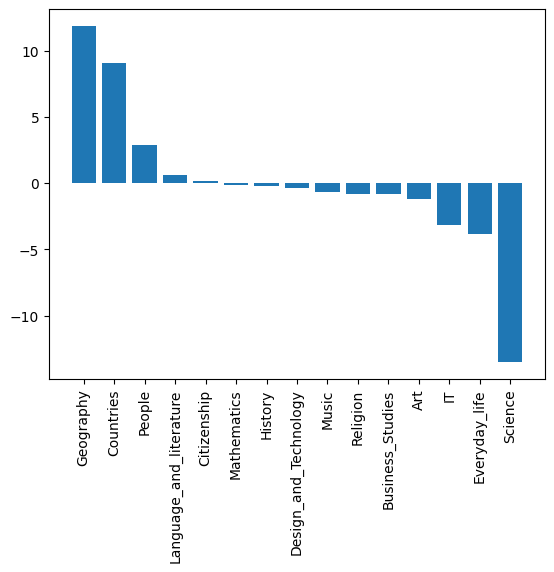

In [54]:
plt.bar(subject_analysis_df_sorted_souscote.index, subject_analysis_df.sort_values('sous_cote_scale', ascending = False)['sous_cote_scale'])
plt.xticks(rotation = 90)
subject_analysis_df_sorted_souscote.index

In [57]:
cat_analysis_df_sorted_souscote.index

Index(['subject.Countries',
       'subject.Geography.European_Geography.European_Countries',
       'subject.Geography.Geography_of_the_Middle_East.Middle_Eastern_Countries',
       'subject.Geography.North_American_Geography',
       'subject.Geography.African_Geography',
       'subject.Geography.Central_and_South_American_Geography.Central_and_South_American_Countries',
       'subject.People.Geographers_and_explorers',
       'subject.Geography.Geography_of_Asia.Asian_Countries',
       'subject.Language_and_literature.Languages',
       'subject.Geography.African_Geography.African_Countries',
       ...
       'subject.Everyday_life.Food_and_agriculture', 'subject.Religion.Myths',
       'subject.Science.Biology.Mammals',
       'subject.Science.Physics.Electricity_and_Electronics',
       'subject.IT.Computing_hardware_and_infrastructure',
       'subject.Everyday_life.Everyday_life',
       'subject.Science.Biology.Insects_Reptiles_and_Fish',
       'subject.Science.Chemistry.C

Index(['Countries', 'Geography.European Geography.European Countries',
       'Geography.Geography of the Middle East.Middle Eastern Countries',
       'Geography.North American Geography', 'Geography.African Geography',
       'Geography.Central and South American Geography.Central and South American Countries',
       'People.Geographers and explorers',
       'Geography.Geography of Asia.Asian Countries',
       'Language and literature.Languages',
       'Geography.African Geography.African Countries',
       ...
       'Everyday life.Food and agriculture', 'Religion.Myths',
       'Science.Biology.Mammals',
       'Science.Physics.Electricity and Electronics',
       'IT.Computing hardware and infrastructure',
       'Everyday life.Everyday life',
       'Science.Biology.Insects Reptiles and Fish',
       'Science.Chemistry.Chemical elements', 'Geography.General Geography',
       'Science.Physics.General Physics'],
      dtype='object', length=129)

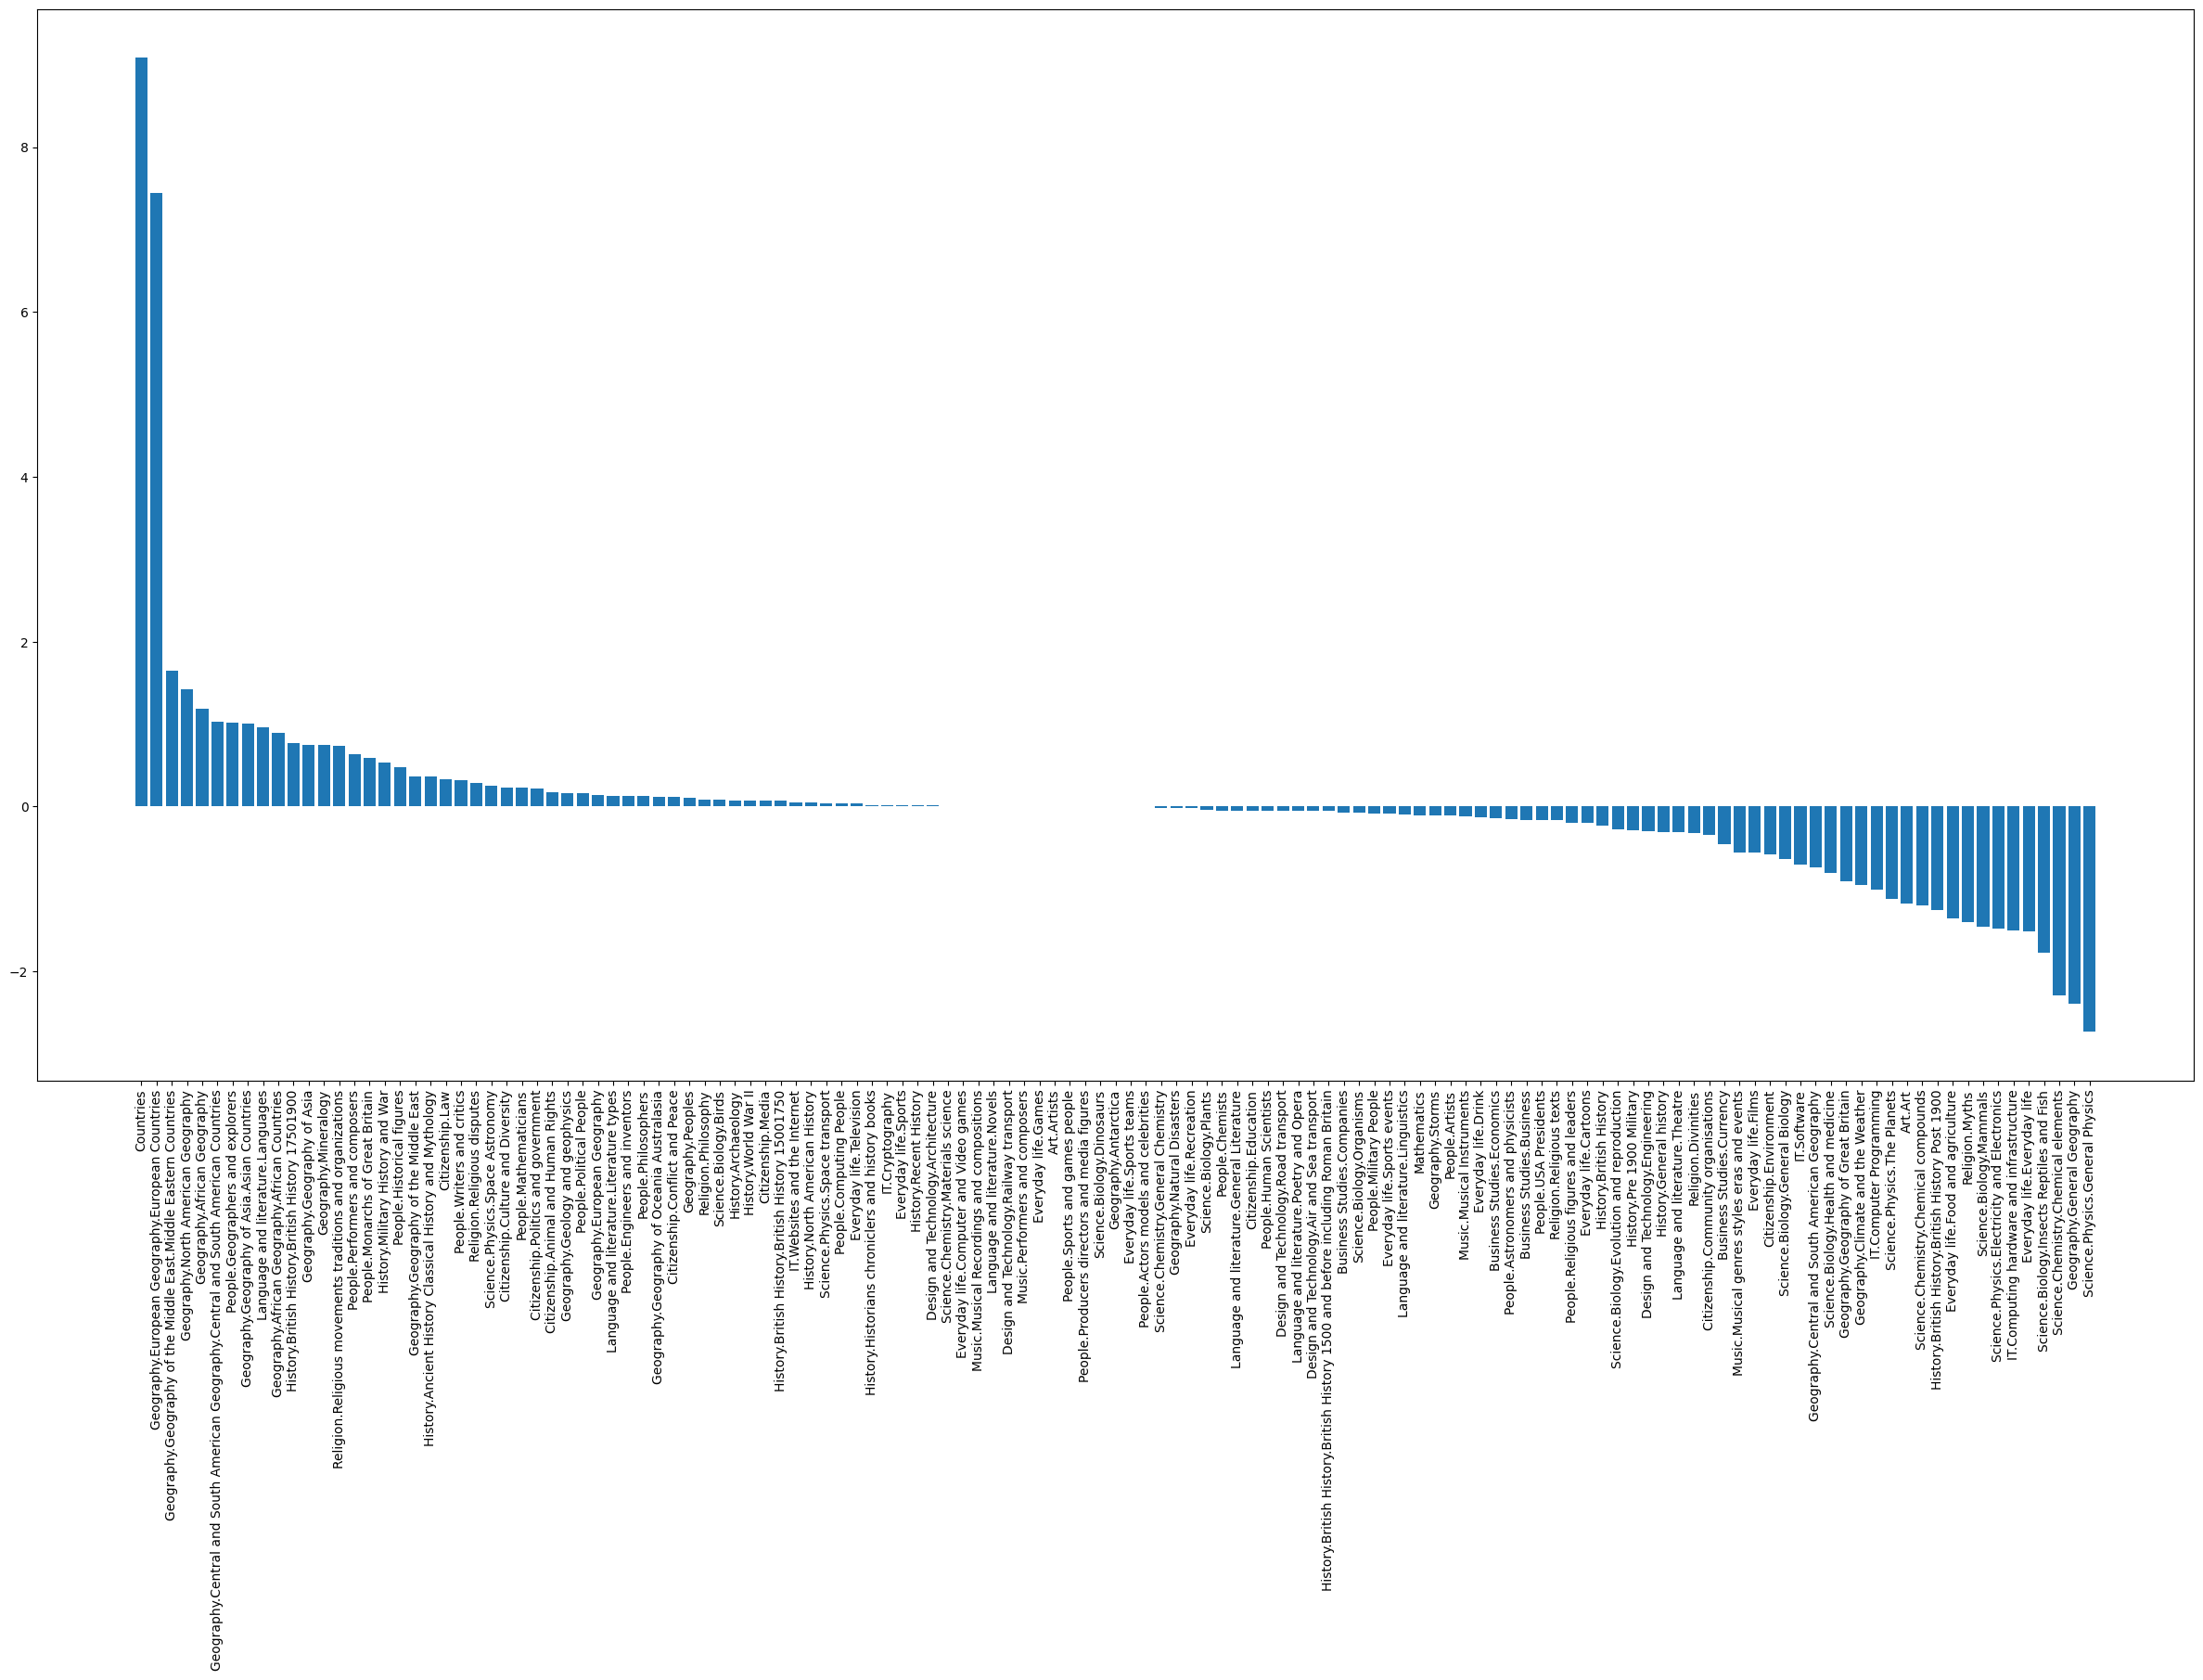

In [60]:
plt.figure(figsize = (30, 15))
plt.bar(cat_analysis_df_sorted_souscote.index.map(lambda x: x[8:].replace('_',' ')), cat_analysis_df.sort_values('sous_cote_scale', ascending = False)['sous_cote_scale'])
plt.xticks(rotation = 90)
cat_analysis_df_sorted_souscote.index.map(lambda x: x[8:].replace('_',' '))